## 1. Welcome!
<p><img src="https://assets.datacamp.com/production/project_1170/img/office_cast.jpeg" alt="Markdown">.</p>
<p><strong>The Office!</strong> What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.</p>
<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code>, which was downloaded from Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>
<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    </div>

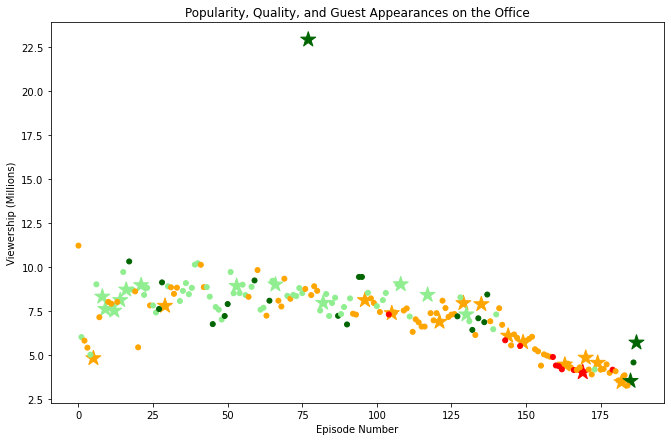

    episode_number  season  episode_title  \
77              77       5  Stress Relief   

                                          description  ratings  votes  \
77  Dwight's too-realistic fire alarm gives Stanle...      9.7   8170   

    viewership_mil  duration release_date  \
77           22.91        60   2009-02-01   

                                  guest_stars       director  \
77  Cloris Leachman, Jack Black, Jessica Alba  Jeffrey Blitz   

             writers  has_guests  scaled_ratings  
77  Paul Lieberstein        True         0.96875  


In [1]:
# Use this cell to begin your analysis, and add as many as you would like!
# This analysis is about using dataframes and visualizing processed data
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize'] = [11, 7]
fig, ax = plt.subplots()

office_df = pd.read_csv('datasets/office_episodes.csv')

office_stars = office_df[office_df['has_guests']==True]
# Episodes are coloured, according to ratings        
colour1 = []
for lab, row in office_stars.iterrows() :
    if row['scaled_ratings'] < .25  :
        colour1.append('red')
    elif row['scaled_ratings'] < .5 and row['scaled_ratings'] >= .25  :
        colour1.append('orange')
    elif row['scaled_ratings'] < .75 and row['scaled_ratings'] >= .5  :
        colour1.append('lightgreen')
    elif row['scaled_ratings'] >= .75 :
        colour1.append('darkgreen')

office_regular = office_df[office_df['has_guests']==False]
colour2 = []
for lab, row in office_regular.iterrows() :
    if row['scaled_ratings'] < .25  :
        colour2.append('red')
    elif row['scaled_ratings'] < .5 and row['scaled_ratings'] >= .25  :
        colour2.append('orange')
    elif row['scaled_ratings'] < .75 and row['scaled_ratings'] >= .5  :
        colour2.append('lightgreen')
    elif row['scaled_ratings'] >= .75 :
        colour2.append('darkgreen')
        
ax.scatter(office_stars.episode_number, office_stars.viewership_mil, marker='*', s=250, c=colour1)
ax.scatter(office_regular.episode_number, office_regular.viewership_mil, s=25, c=colour2)

ax.set_title('Popularity, Quality, and Guest Appearances on the Office')
ax.set_xlabel('Episode Number')
ax.set_ylabel('Viewership (Millions)')

plt.show()

most_watched = office_df[office_df['viewership_mil'] > 20]
print(most_watched)
# Below is one of the stars who was in the most-viewed episode
top_star = 'Jack Black'